In [5]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np


Bad key "text.kerning_factor" on line 4 in
/opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [6]:
import os
import glob
import sys
import time
from sklearn import metrics
import numpy
import pdb
import argparse

def compute_c_norm(fnr, fpr, p_target, c_miss=1, c_fa=1):
    """ computes normalized minimum detection cost function (DCF) given
        the costs for false accepts and false rejects as well as a priori
        probability for target speakers
    """

    dcf = c_miss * fnr * p_target + c_fa * fpr * (1 - p_target)
    c_det, c_det_ind = min(dcf), numpy.argmin(dcf)
    c_def = min(c_miss * p_target, c_fa * (1 - p_target))

    return c_det/c_def, c_det_ind

def tuneThresholdfromScore_my(scores, labels, target_fa=None, target_fr=None):
    
    fpr, tpr, thresholds = metrics.roc_curve(labels, scores, pos_label=1)
    fnr = 1 - tpr

    ## compute minc@0.01 and minc@0.001
    minc_s, ind_1 = compute_c_norm(fnr, fpr, p_target=0.01)
    minc_ss, ind_2 = compute_c_norm(fnr, fpr, p_target=0.001)
    
    fnr = fnr
    fpr = fpr

    tunedThreshold = []
    if target_fr:
        for tfr in target_fr:
            idx = numpy.nanargmin(numpy.absolute((tfr - fnr)))
            tunedThreshold.append([thresholds[idx], fpr[idx], fnr[idx]])
    if target_fa:
        for tfa in target_fa:
            idx = numpy.nanargmin(numpy.absolute((tfa - fpr))) # numpy.where(fpr<=tfa)[0][-1]
            tunedThreshold.append([thresholds[idx], fpr[idx], fnr[idx]])
    
    idxE = numpy.nanargmin(numpy.absolute((fnr - fpr)))
    eer  = max(fpr[idxE],fnr[idxE])
    
    return (tunedThreshold, eer, fpr, fnr, minc_s, minc_ss, ind_1, ind_2)

In [7]:
X_vector = '/workspace/LOGS_OUTPUT/server9_nvme1/ASV_LOGS_202102/train_logs_201120/xvector(vox2)/result/model000000134.vox1osc'
ECAPATDNNL = '/workspace/LOGS_OUTPUT/server9_nvme1/ASV_LOGS_202102/train_logs_201120/ECAPA-TDNNL(vox2)/result/model000000134.vox1osc'
ECAPATDNN = '/workspace/LOGS_OUTPUT/server9_nvme1/ASV_LOGS_202102/train_logs_201120/vox2_newsystem_base_epacatdnn/result/model000000134.vox1osc'
ECAPATDNN_aug = '/workspace/LOGS_OUTPUT/server9_nvme1/ASV_LOGS_202102/train_logs_201120/multi_gpu_epaca_tdnn_soxaug/result/model000000034.vox1osc'
ECAPATDNN_asnorm = '/workspace/LOGS_OUTPUT/server9_nvme1/ASV_LOGS_202102/train_logs_201120/multi_gpu_epaca_tdnn_soxaug/result/model000000034_as1.txt'

repVGG_B1_64d_sox = '/workspace/LOGS_OUTPUT/server9_nvme1/ASV_LOGS_202102/train_logs_201120/repVGG_B1_64d_sox/result/model000000040.vox1osc'
Resnet34L = '/workspace/LOGS_OUTPUT/server9_nvme1/ASV_LOGS_202102/train_logs_201120/Resnet34L/result/model000000134.vox1osc'
SEResnet34L = '/workspace/LOGS_OUTPUT/server9_nvme1/ASV_LOGS_202102/train_logs_201120/SE-ResnetL/result/model000000134.vox1osc'
SERes2net50 = '/workspace/LOGS_OUTPUT/server9_nvme1/ASV_LOGS_202102/train_logs_201120/SE-Res2net50/result/model000000100.vox1osc'
SEResnet34 = '/workspace/LOGS_OUTPUT/server9_nvme1/ASV_LOGS_202102/train_logs_201120/single_gpu_resnetsev2/result/model000000120.vox1osc'

In [8]:
KEYS = '/workspace/DATASET/server9_ssd/sdsv21/vox_o_triallist.txt'

In [9]:
with open(X_vector, 'r') as f:
    lines = f.readlines()
    
scores = []
for i in lines:
    scores.append(float(i.split(' ')[0]))
scores = numpy.array(scores)

In [10]:
with open(ECAPATDNNL, 'r') as f:
    lines = f.readlines()
    
scores_2 = []
for i in lines:
    scores_2.append(float(i.split(' ')[0]))
scores_2 = numpy.array(scores_2)

In [11]:
with open(ECAPATDNN, 'r') as f:
    lines = f.readlines()
    
scores_3 = []
for i in lines:
    scores_3.append(float(i.split(' ')[0]))
scores_3 = numpy.array(scores_3)

In [12]:
with open(ECAPATDNN_aug, 'r') as f:
    lines = f.readlines()
    
scores_4 = []
for i in lines:
    scores_4.append(float(i.split(' ')[0]))
scores_4 = numpy.array(scores_4)

In [13]:
with open(ECAPATDNN_asnorm, 'r') as f:
    lines = f.readlines()
    
scores_5 = []
for i in lines:
    scores_5.append(float(i.split(' ')[0]))
scores_5 = numpy.array(scores_5)

In [14]:
with open(repVGG_B1_64d_sox, 'r') as f:
    lines = f.readlines()
    
scores_6 = []
for i in lines:
    scores_6.append(float(i.split(' ')[0]))
scores_6 = numpy.array(scores_6)

In [15]:
with open(Resnet34L, 'r') as f:
    lines = f.readlines()
    
scores_7 = []
for i in lines:
    scores_7.append(float(i.split(' ')[0]))
scores_7 = numpy.array(scores_7)

In [16]:
with open(SEResnet34L, 'r') as f:
    lines = f.readlines()
    
scores_8 = []
for i in lines:
    scores_8.append(float(i.split(' ')[0]))
scores_8 = numpy.array(scores_8)

In [17]:
with open(SERes2net50, 'r') as f:
    lines = f.readlines()
    
scores_9 = []
for i in lines:
    scores_9.append(float(i.split(' ')[0]))
scores_9 = numpy.array(scores_9)

In [18]:
with open(SEResnet34, 'r') as f:
    lines = f.readlines()
    
scores_10 = []
for i in lines:
    scores_10.append(float(i.split(' ')[0]))
scores_10 = numpy.array(scores_10)

In [19]:
with open(KEYS, 'r') as f:
    lines = f.readlines()

keys = []
for i in lines:
    keys.append(int(i.split(' ')[0]))
keys = numpy.array(keys)

In [20]:
tunedThreshold, eer, fpr, fnr, minc_s_1, minc_ss, ind_1, ind_2 = tuneThresholdfromScore_my(scores, keys)
tunedThreshold, eer_2, fpr_2, fnr_2, minc_s_2, minc_ss, ind_1_2, ind_2 = tuneThresholdfromScore_my(scores_2, keys)
tunedThreshold, eer_3, fpr_3, fnr_3, minc_s_3, minc_ss, ind_1_3, ind_3 = tuneThresholdfromScore_my(scores_3, keys)
tunedThreshold, eer_4, fpr_4, fnr_4, minc_s_4, minc_ss, ind_1_4, ind_4 = tuneThresholdfromScore_my(scores_4, keys)
tunedThreshold, eer_5, fpr_5, fnr_5, minc_s_5, minc_ss, ind_1_5, ind_5 = tuneThresholdfromScore_my(scores_5, keys)
tunedThreshold, eer_6, fpr_6, fnr_6, minc_s_6, minc_ss, ind_1_6, ind_6 = tuneThresholdfromScore_my(scores_6, keys)
tunedThreshold, eer_7, fpr_7, fnr_7, minc_s_7, minc_ss, ind_1_7, ind_7 = tuneThresholdfromScore_my(scores_7, keys)
tunedThreshold, eer_8, fpr_8, fnr_8, minc_s_8, minc_ss, ind_1_8, ind_8 = tuneThresholdfromScore_my(scores_8, keys)
tunedThreshold, eer_9, fpr_9, fnr_9, minc_s_9, minc_ss, ind_1_9, ind_9 = tuneThresholdfromScore_my(scores_9, keys)
tunedThreshold, eer_10, fpr_10, fnr_10, minc_s_10, minc_ss, ind_1_10, ind_10 = tuneThresholdfromScore_my(scores_10, keys)

In [21]:
from scipy.interpolate import make_interp_spline, interp1d
# xnew = np.linspace(T.min(),T.max(),300) #300 represents number of points to make between T.min and T.max
# power_smooth = spline(T,power,xnew)
# plt.plot(xnew,power_smooth)
# plt.show()
# X_Y_Spline = make_interp_spline(x, y)
 
# # Returns evenly spaced numbers
# # over a specified interval.
# X_ = np.linspace(x.min(), x.max(), 500)
# Y_ = X_Y_Spline(X_)

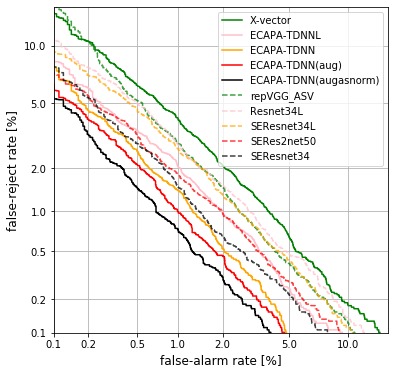

In [29]:
plt.figure(figsize=(6, 6))
# p_miss = norm.ppf(fnr)
# p_fa = norm.ppf(fpr)

xytick = [0.0001, 0.0002, 0.0005, 0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.4]
xtick_labels = map(str, [x * 100 for x in xytick])
ytick_labels = map(str, [x * 100 for x in xytick])

a = norm.ppf(xytick)

plt.yticks(a, xtick_labels)
plt.xticks(a, ytick_labels)
plt.ylim(norm.ppf([0.001, 0.15]))
plt.xlim(norm.ppf([0.001, 0.15]))

plt.xlabel("false-alarm rate [%]", fontsize=12)
plt.ylabel("false-reject rate [%]", fontsize=12)

plt.plot(norm.ppf(fpr), norm.ppf(fnr), 'green', linewidth=1.5, label='X-vector')
plt.plot(norm.ppf(fpr_2), norm.ppf(fnr_2), 'pink', linewidth=1.5, label='ECAPA-TDNNL')
plt.plot(norm.ppf(fpr_3), norm.ppf(fnr_3), 'orange', linewidth=1.5, label='ECAPA-TDNN')
plt.plot(norm.ppf(fpr_4), norm.ppf(fnr_4), 'red', linewidth=1.5, label='ECAPA-TDNN(aug)')
plt.plot(norm.ppf(fpr_5), norm.ppf(fnr_5), 'black', linewidth=1.5, label='ECAPA-TDNN(augasnorm)')

plt.plot(norm.ppf(fpr_6), norm.ppf(fnr_6), 'green', alpha=0.75, linestyle= '--', label='repVGG_ASV')
plt.plot(norm.ppf(fpr_7), norm.ppf(fnr_7), 'pink', alpha=0.75, linestyle= '--', label='Resnet34L')
plt.plot(norm.ppf(fpr_8), norm.ppf(fnr_8), 'orange', alpha=0.75, linestyle= '--', label='SEResnet34L')
plt.plot(norm.ppf(fpr_9), norm.ppf(fnr_9), 'red', alpha=0.75, linestyle= '--', label='SERes2net50')
plt.plot(norm.ppf(fpr_10), norm.ppf(fnr_10), 'black', alpha=0.75, linestyle= '--', label='SEResnet34')


plt.legend()
plt.grid()
plt.savefig('det.png', dpi=500, bbox_inches='tight')
plt.show()